In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
X = data.drop(["sales"],axis=1)
y = data["sales"]

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_model=PolynomialFeatures(degree=2,include_bias=False)

In [12]:
poly_features=polynomial_model.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
mean_absolute_error(y_test,y_pred)

0.4896798044803488

In [23]:
mean_squared_error(y_test,y_pred)

0.44175055104033534

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.6646431757268974

In [ ]:
#Choosing the best degree of polynomial

In [28]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [29]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.3517083688399351,
 0.2509342963430113,
 0.20133513038009845,
 5.429520563715136,
 0.20863760278608115,
 0.1770500204452294]

In [30]:
test_rmse_errors

[1.5161519375993884,
 0.6646431757268974,
 0.5803286825163759,
 0.5077742634646342,
 2.575821985419571,
 4.417531343659344,
 1368.3538320876737,
 4031.580723848077,
 99797.38687757951]

In [69]:
rmse_errors=pd.DataFrame({"train_rmse_errors":train_rmse_errors,"test_rmse_errors":test_rmse_errors},index=[1,2,3,4,5,6,7,8,9])

In [70]:
rmse_errors

,train_rmse_errors,test_rmse_errors
1,1.734594,1.516152
2,0.587957,0.664643
3,0.433934,0.580329
4,0.351708,0.507774
5,0.250934,2.575822
6,0.201335,4.417531
7,5.429521,1368.353832
8,0.208638,4031.580724
9,0.177050,99797.386878


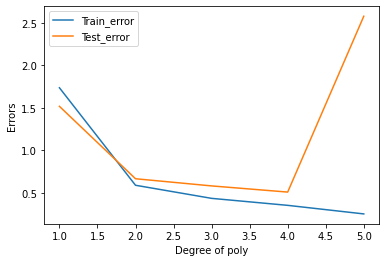

In [80]:
plt.plot(range(1,6),train_rmse_errors[0:5],label="Train_error")
plt.plot(range(1,6),test_rmse_errors[0:5],label="Test_error")
plt.legend()
plt.xlabel("Degree of poly")
plt.ylabel("Errors")
plt.show()

In [81]:
#Deployment

In [83]:
final_poly_convertor=PolynomialFeatures(degree=3,include_bias=False)
fully_converted_X=final_poly_convertor.fit_transform(X)
final_model=LinearRegression()

In [84]:
final_model.fit(fully_converted_X,y)

LinearRegression()

In [82]:
from joblib import dump,load

In [86]:
dump(final_model,"final_poly_model.joblib")

['final_poly_model.joblib']

In [87]:
dump(final_poly_convertor,"final_convertor.joblib")

['final_convertor.joblib']

In [91]:
loaded_model=load("final_poly_model.joblib")

In [90]:
loaded_convertor=load("final_convertor.joblib")

In [92]:
campaign=[[149,22,12]]

In [94]:
model_parameters=loaded_convertor.fit_transform(campaign)

In [96]:
loaded_model.predict(model_parameters)

array([14.64501014])